In [218]:
#Import libraries
import pandas as pd
import numpy as np
import os
import yaml
import pickle
import matplotlib.pyplot as plt

In [226]:
global_path = os.getcwd()
results_folder = "results"
sim_folder = "sim_results"
sim_file = "sim_100_10_6decks_HIGH_OPT_1_50_1.pkl"
path_to_sim = os.path.join(global_path, results_folder, sim_folder, sim_file)

with open(path_to_sim, 'rb') as f:
    sim_results = pickle.load(f)

In [227]:
def money_per_session_counter(results_sim):

    money_session_results = {}

    for session in sim_results.keys():

        money_session_results[session] = []

        for shoe in sim_results[session].keys():

            for round in sim_results[session][shoe].keys():

                for result in sim_results[session][shoe][round]["MONEY_RESULTS"]:

                   money_session_results[session].append(result)

    return money_session_results 


In [228]:

money_session_results = money_per_session_counter(sim_results)

In [229]:
for session in money_session_results.keys():

    print(session, "-------------------", sum(money_session_results[session]))
    

SESSION_1 ------------------- 4675.0
SESSION_2 ------------------- 325.0
SESSION_3 ------------------- 8800.0
SESSION_4 ------------------- -6825.0
SESSION_5 ------------------- -3000.0
SESSION_6 ------------------- -2275.0
SESSION_7 ------------------- -2500.0
SESSION_8 ------------------- 525.0
SESSION_9 ------------------- -4300.0
SESSION_10 ------------------- -4875.0
SESSION_11 ------------------- -2525.0
SESSION_12 ------------------- -1325.0
SESSION_13 ------------------- -11675.0
SESSION_14 ------------------- -6200.0
SESSION_15 ------------------- 825.0
SESSION_16 ------------------- -300.0
SESSION_17 ------------------- -8525.0
SESSION_18 ------------------- 5250.0
SESSION_19 ------------------- 4925.0
SESSION_20 ------------------- 2900.0
SESSION_21 ------------------- 825.0
SESSION_22 ------------------- -8950.0
SESSION_23 ------------------- -4050.0
SESSION_24 ------------------- 3675.0
SESSION_25 ------------------- 2625.0
SESSION_26 ------------------- -2625.0
SESSION_27

In [230]:
money_per_session = []
for session in money_session_results.keys():

    money_per_session.append(sum(money_session_results[session]))

In [231]:
rounds_played = 100 * 10 * len(money_per_session)
sum(money_per_session) / rounds_played

-0.95875

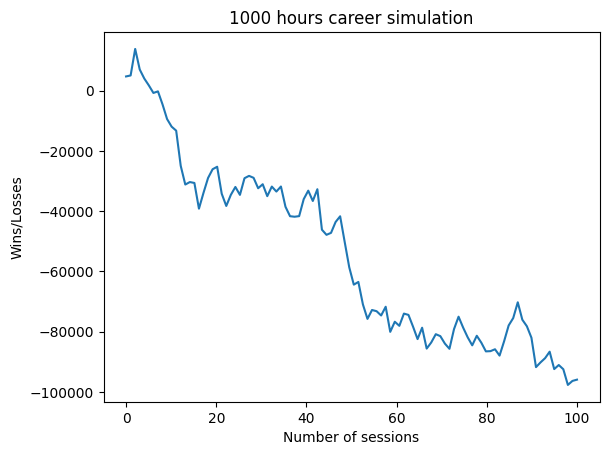

In [232]:
#Plot how many per session change after every session
x_axis = np.linspace(0, len(money_per_session), len(money_per_session))
plt.plot(x_axis, np.cumsum(money_per_session))
plt.ylabel("Wins/Losses")
plt.xlabel("Number of sessions")
plt.title("1000 hours career simulation")
plt.show()


In [192]:
def true_count_counter(results_sim):

    true_count_list = []

    for session in sim_results.keys():

        money_session_results[session] = []

        for shoe in sim_results[session].keys():

            for round in sim_results[session][shoe].keys():
                
                true_count = sim_results[session][shoe][round]["TRUE_COUNT"]
                true_count_list.append(true_count)

    return true_count_list 

In [193]:
true_count_list = true_count_counter(sim_results)

In [194]:
unique_counts = list(set(true_count_list))
unique_counts.sort()
total_counts = len(true_count_list)

for true_count in unique_counts:

    count_true_count = true_count_list.count(true_count)

    perc_occur = round(count_true_count / total_counts * 100, 4)

    print("The true count {count} occurs {perc}% of the time".format(count = true_count, perc = perc_occur))



The true count -15 occurs 0.0098% of the time
The true count -14 occurs 0.0393% of the time
The true count -13 occurs 0.0491% of the time
The true count -12 occurs 0.0981% of the time
The true count -11 occurs 0.0589% of the time
The true count -10 occurs 0.0589% of the time
The true count -9 occurs 0.1374% of the time
The true count -8 occurs 0.5397% of the time
The true count -7 occurs 0.3631% of the time
The true count -6 occurs 1.0893% of the time
The true count -5 occurs 1.6487% of the time
The true count -4 occurs 3.7095% of the time
The true count -3 occurs 5.2601% of the time
The true count -2 occurs 10.6968% of the time
The true count -1 occurs 19.3131% of the time
The true count 0 occurs 25.947% of the time
The true count 1 occurs 12.3356% of the time
The true count 2 occurs 8.1747% of the time
The true count 3 occurs 4.1904% of the time
The true count 4 occurs 2.6693% of the time
The true count 5 occurs 1.1973% of the time
The true count 6 occurs 1.0697% of the time
The true

In [240]:
# See if there is a difference in wins when count is positive

def true_count_counter(results_sim):

    true_count_dict = {}

    for session in sim_results.keys():

        money_session_results[session] = []

        for shoe in sim_results[session].keys():

            for round in sim_results[session][shoe].keys():
                
                true_count = sim_results[session][shoe][round]["TRUE_COUNT"]

                for result in sim_results[session][shoe][round]["HAND_RESULTS"]:
                        
                    if true_count in true_count_dict:

                        true_count_dict[true_count].append(result)

                    else:

                        true_count_dict[true_count] = []
                        true_count_dict[true_count].append(result)

    return true_count_dict 

In [241]:
true_count_results = true_count_counter(sim_results)

In [245]:
unique_counts = list(set(list(true_count_results.keys())))
unique_counts.sort()

for true_count in unique_counts:

    if (true_count > -7) & (true_count < 7):
        true_count_list = true_count_results[true_count]

        win_count = true_count_list.count("win")
        win_doubledown = true_count_list.count("win_doubledown")
        win_blackjack = true_count_list.count("win_blackjack")
        loss = true_count_list.count("loss")
        draw = true_count_list.count("draw")

        total_hands = len(true_count_list)

        perc_win = round(win_count / total_hands * 100, 2)
        perc_blackjack = round(win_blackjack / total_hands * 100, 2)
        perc_doubledown = round(win_doubledown / total_hands * 100, 2)
        loss_perc = round(loss / total_hands * 100, 2)
        draw_perc = round(draw / total_hands * 100, 2)

        print("----------------------- WHEN THE COUNT IS {COUNT} ----------------------------".format(COUNT = true_count))
        print("The win percentage is {perc}".format(perc = perc_win))
        print("The blackjack percentage is {perc}".format(perc = perc_blackjack))
        print("The doubledown percentage is {perc}".format(perc = perc_doubledown))
        print("The draw percentage is {perc}".format(perc = draw_perc))
        print("The loss percentage is {perc}".format(perc = loss_perc))



----------------------- WHEN THE COUNT IS -6 ----------------------------
The win percentage is 34.54
The blackjack percentage is 5.97
The doubledown percentage is 3.7
The draw percentage is 8.4
The loss percentage is 44.12
----------------------- WHEN THE COUNT IS -5 ----------------------------
The win percentage is 31.62
The blackjack percentage is 5.19
The doubledown percentage is 4.76
The draw percentage is 9.16
The loss percentage is 45.05
----------------------- WHEN THE COUNT IS -4 ----------------------------
The win percentage is 33.95
The blackjack percentage is 5.37
The doubledown percentage is 4.76
The draw percentage is 8.47
The loss percentage is 43.5
----------------------- WHEN THE COUNT IS -3 ----------------------------
The win percentage is 34.61
The blackjack percentage is 4.34
The doubledown percentage is 4.77
The draw percentage is 8.02
The loss percentage is 44.48
----------------------- WHEN THE COUNT IS -2 ----------------------------
The win percentage is 33.